# Extracting data from Tinderbox XML

Many of the applications we use everyday store their data in a form we can access programmatically. One example is the notes application [Tinderbox](https://www.eastgate.com/Tinderbox/), which stores its data in XML files.

In this very short notebook, we will be extracting addresses from a Tinderbox file.

If you look carefully at the XML produced by Tinderbox, it contains many `<item>` elements, each of which in turn comprises a number of `<attribute>`s.

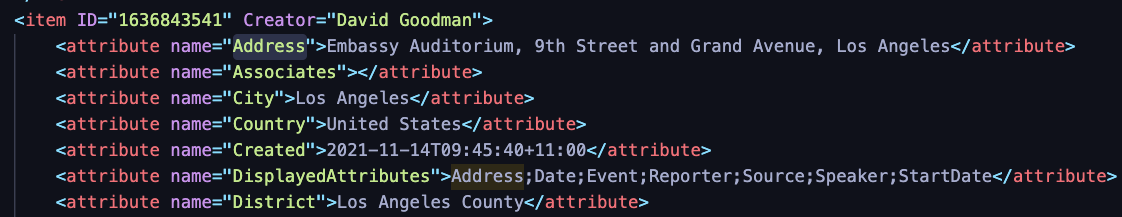

## What python packages do we need?

Here we use just two python packages:

1. *BeautifulSoup* will help us to find the addresses in the XML document.
2. *decouple* gives us a way to access the filepath of our XML without including it in the code.

In [1]:
from bs4 import BeautifulSoup
from decouple import AutoConfig

In [3]:
config = AutoConfig("../env")
filepath = config("TINDERBOX_PATH")

In [4]:
with open(filepath, "r") as f:
    soup = BeautifulSoup(f.read(), "xml")

addresses = sorted({a.text for a in soup.find_all("attribute", {"name": "Address"})})

In [5]:
addresses

['',
 '1577 Crossroads of the World, Hollywood',
 '220 West Broadway, Glendale',
 '241 S. Western Ave.',
 '4601 Crenshaw Blvd.',
 '733 South Burlington Avenue Los Angeles',
 '?',
 'AFC headquarters, 3142 Wilshire Boulevard',
 'Alhambra',
 'Blue Room, Fifh Street Store',
 'Borad of Education building, Pasadena',
 'Church hall at 241 S. Western Ave.',
 'Elysian Park, Los Angeles',
 'Embassy Auditorium, 9th Street and Grand Avenue, Los Angeles',
 'Exposition Park',
 'First Congregational Church,  6th and Hoover',
 'Hollywood Roosevelt Hotel, 7000 Hollywood Boulevard, Los Angeles',
 'Home of Mr and Mrs Vernard L. Maxam, 4 Berkeley Square',
 'IOOF Hall, Friar Street, Van Nuys',
 'IOOF hall, Workman and North Broadway, Lincoln Heights',
 "John Wheeler's office, Pacific Mutual building",
 'Masonic Hall, 234 S. Brand Avenue, Glendale',
 'McKinley Junior High school, Oak Knoll and Miramar, Pasadena',
 'Olympic Auditorium',
 'Philharmonic Auditorium, 5th and Olive streets, Los Angeles',
 'Poppy 

## What next?

While this notebook was very short, it demonstrated that many of the files sitting around on your computer can be queried programmatically. In this instance, the next step may be to geocode these addresses for presentation on a map.